# This tutorail will show how to build simple KNN, RF and ANN with python step by step
- author : Louis
- date : 2017 / 09 / 14

### Import Library

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.callbacks import History 
from keras.layers import Dropout

Using TensorFlow backend.


### Initialize Random Number Generator

In [3]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

### Load The Dataset

In [4]:
# load dataset
dataframe = pd.read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

NameError: name 'pandas' is not defined

In [6]:
filename = 'Dataset/iris.csv'
dataframe = pd.read_csv(filename)
dataframe.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Split data into training and testing set

In [8]:
uni_class = set(dataframe['class'].values.tolist())
print(uni_class)

{'Iris-versicolor', 'Iris-virginica', 'Iris-setosa'}


In [22]:
split_ratio = 0.8
train_tmp = []
test_tmp = []

for item in uni_class:
    print(item)
    df_tmp = dataframe[dataframe['class'] == item]
    train_num = int(len(df_tmp)*split_ratio)
    print(train_num)
    train_tmp.extend(df_tmp[:train_num].values.tolist())
    test_tmp.extend(df_tmp[train_num:].values.tolist())

print(len(train_tmp))

Iris-versicolor
40
Iris-virginica
40
Iris-setosa
40
120


In [26]:
print(train_tmp)
x_train = np.array(train_tmp)[:, 0:4].astype(float)
y_train = np.array(train_tmp)[:, -1]
x_test  = np.array(test_tmp)[:, 0:4].astype(float)
y_test  = np.array(test_tmp)[:, 4]

# print(y_train)

[[7.0, 3.2, 4.7, 1.4, 'Iris-versicolor'], [6.4, 3.2, 4.5, 1.5, 'Iris-versicolor'], [6.9, 3.1, 4.9, 1.5, 'Iris-versicolor'], [5.5, 2.3, 4.0, 1.3, 'Iris-versicolor'], [6.5, 2.8, 4.6, 1.5, 'Iris-versicolor'], [5.7, 2.8, 4.5, 1.3, 'Iris-versicolor'], [6.3, 3.3, 4.7, 1.6, 'Iris-versicolor'], [4.9, 2.4, 3.3, 1.0, 'Iris-versicolor'], [6.6, 2.9, 4.6, 1.3, 'Iris-versicolor'], [5.2, 2.7, 3.9, 1.4, 'Iris-versicolor'], [5.0, 2.0, 3.5, 1.0, 'Iris-versicolor'], [5.9, 3.0, 4.2, 1.5, 'Iris-versicolor'], [6.0, 2.2, 4.0, 1.0, 'Iris-versicolor'], [6.1, 2.9, 4.7, 1.4, 'Iris-versicolor'], [5.6, 2.9, 3.6, 1.3, 'Iris-versicolor'], [6.7, 3.1, 4.4, 1.4, 'Iris-versicolor'], [5.6, 3.0, 4.5, 1.5, 'Iris-versicolor'], [5.8, 2.7, 4.1, 1.0, 'Iris-versicolor'], [6.2, 2.2, 4.5, 1.5, 'Iris-versicolor'], [5.6, 2.5, 3.9, 1.1, 'Iris-versicolor'], [5.9, 3.2, 4.8, 1.8, 'Iris-versicolor'], [6.1, 2.8, 4.0, 1.3, 'Iris-versicolor'], [6.3, 2.5, 4.9, 1.5, 'Iris-versicolor'], [6.1, 2.8, 4.7, 1.2, 'Iris-versicolor'], [6.4, 2.9, 4.3,

In [51]:
a = [1,2,3,4,5]
b = np.array(a)[[0,2,-1]]
b

array([1, 3, 5])

In [45]:
b = np.array(a)[:,2:4]
b

array([[ 3, 45],
       [ 2,  2]])

### Encode The Output Variable

In [54]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
print(encoded_Y)
# convert integers to dummy variables (i.e. one hot encoded)
y_train_onehot = np_utils.to_categorical(encoded_Y)
print(y_train_onehot)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
[[ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.

In [55]:
a= 1
b= 2
c = a+b

### Build baseline model

In [59]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()   sigmoid. tanh, relu .....
    model.add(Dense(16, input_dim=4, activation='relu'))
#     model.add(Dropout(0.1))
#     model.add(Dense(16, input_dim=4, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(32, input_dim=4, activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [61]:
model = baseline_model()

batch_size = 5
nb_epoch = 200
history = model.fit(x_train, y_train_onehot, batch_size=batch_size, epochs=nb_epoch, shuffle=True)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
120/120 [==============================] - 0s - loss: 2.3677 - acc: 0.3333     
Epoch 2/200
120/120 [==============================] - 0s - loss: 1.7922 - acc: 0.1500     
Epoch 3/200
120/120 [==============================] - 0s - loss: 1.4292 - acc: 0.0917     
Epoch 4/200
120/120 [==============================] - 0s - loss: 1.1797 - acc: 0.0917        
Epoch 5/200
120/120 [==============================] - 0s - loss: 1.0400 - acc: 0.0583        
Epoch 6/200
120/120 [==============================] - 0s - loss: 0.9647 -

120/120 [==============================] - 0s - loss: 0.1184 - acc: 0.9750     
Epoch 170/200
120/120 [==============================] - 0s - loss: 0.1144 - acc: 0.9750     
Epoch 171/200
120/120 [==============================] - 0s - loss: 0.1155 - acc: 0.9667     
Epoch 172/200
120/120 [==============================] - 0s - loss: 0.1163 - acc: 0.9667     
Epoch 173/200
120/120 [==============================] - 0s - loss: 0.1125 - acc: 0.9750     
Epoch 174/200
120/120 [==============================] - 0s - loss: 0.1144 - acc: 0.9667     
Epoch 175/200
120/120 [==============================] - 0s - loss: 0.1141 - acc: 0.9667     
Epoch 176/200
120/120 [==============================] - 0s - loss: 0.1160 - acc: 0.9750     
Epoch 177/200
120/120 [==============================] - 0s - loss: 0.1143 - acc: 0.9667     
Epoch 178/200
120/120 [==============================] - 0s - loss: 0.1100 - acc: 0.9667     
Epoch 179/200
120/120 [==============================] - 0s - loss: 0.1163

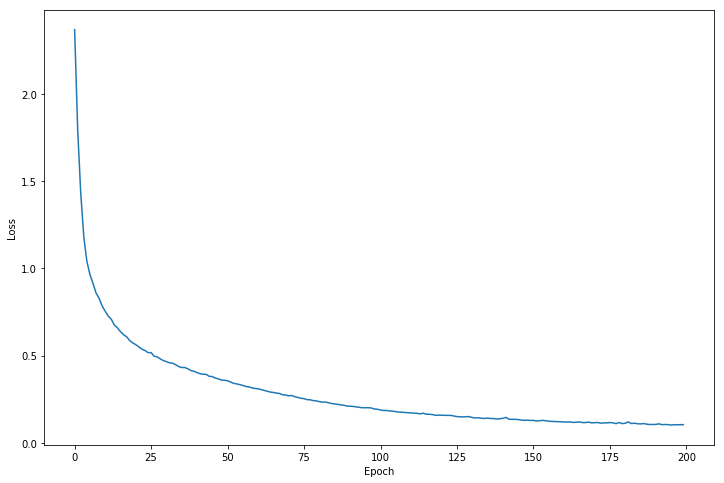

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 8))
plt.plot(history.epoch, history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

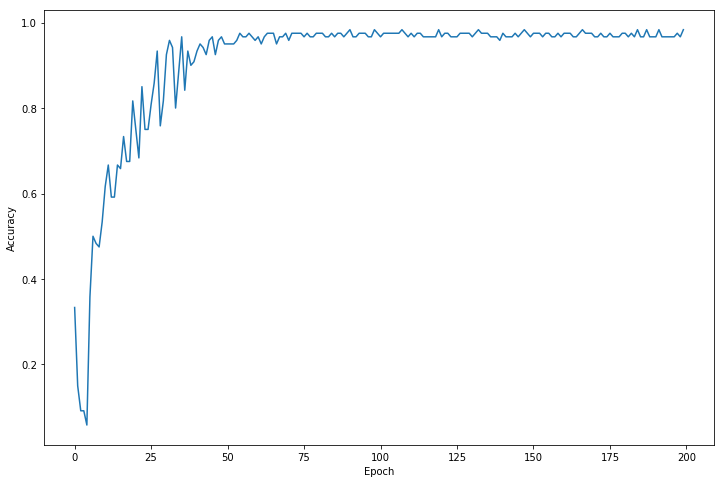

0.983333334327


In [63]:
plt.figure(figsize=(12, 8))
plt.plot(history.epoch, history.history['acc'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()
print(max(history.history['acc']))

```
train_num = int(len(train_tmp)*split_ratio)
print(len(train_tmp))
x_train = np.array(train_tmp)[:train_num, 0:4].astype(float)
x_val   = np.array(train_tmp)[train_num:, 0:4].astype(float)
y_train = np.array(train_tmp)[:train_num, 4]
y_val   = np.array(train_tmp)[train_num:, 4]
x_test  = np.array(test_tmp)[:, 0:4].astype(float)
y_test  = np.array(test_tmp)[:, 4]

print(y_val)
```

```
def onehot_encoding(y_):
    # encode class values as integers
    encoder = LabelEncoder()
    encoder.fit(y_)
    encoded_Y = encoder.transform(y_)
    # convert integers to dummy variables (i.e. one hot encoded)
    y_onehot = np_utils.to_categorical(encoded_Y)
    return y_onehot

y_train_onehot = onehot_encoding(y_train)
y_val_onehot = onehot_encoding(y_val)

history = model.fit(x_train, y_train_onehot, batch_size=batch_size, epochs=nb_epoch, validation_data=(x_val, y_val_onehot), shuffle=True)
```